In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df=df.drop(columns='Surname',axis=1)

In [ ]:
df=df.drop(columns='RowNumber',axis=1)

In [ ]:
df=df.drop(columns='CustomerId',axis=1)

In [ ]:
df.shape

(10000, 11)

In [ ]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


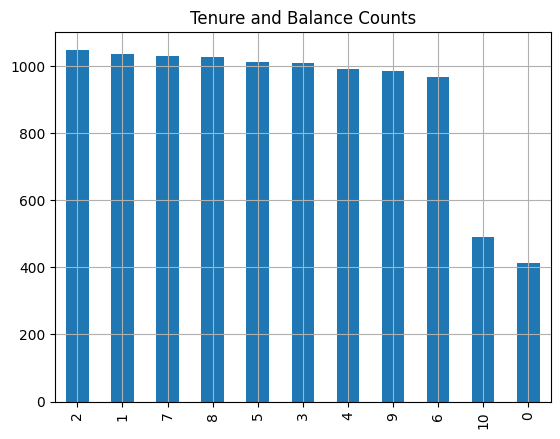

In [ ]:
df['Tenure'].value_counts().plot(kind='bar',title='Tenure and Balance Counts',grid=True)
plt.show()

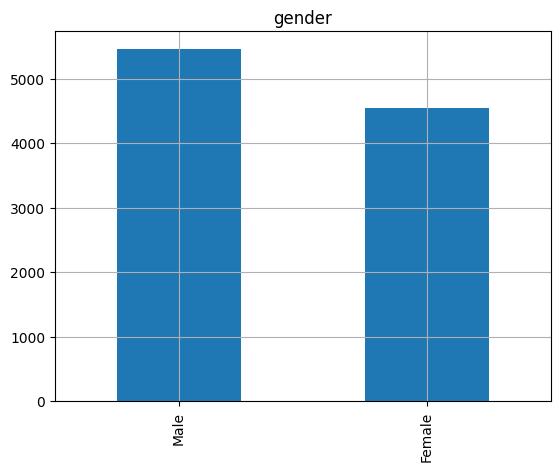

In [ ]:
df['Gender'].value_counts().plot(kind='bar',title='gender',grid=True)
plt.show()

<Axes: >

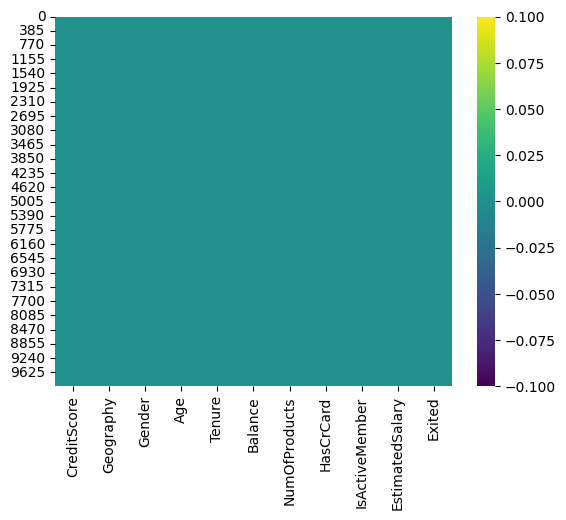

In [ ]:
sns.heatmap(df.isnull(),cmap='viridis')

In [ ]:
df=pd.get_dummies(df,columns=['Geography','Gender'])

<Axes: >

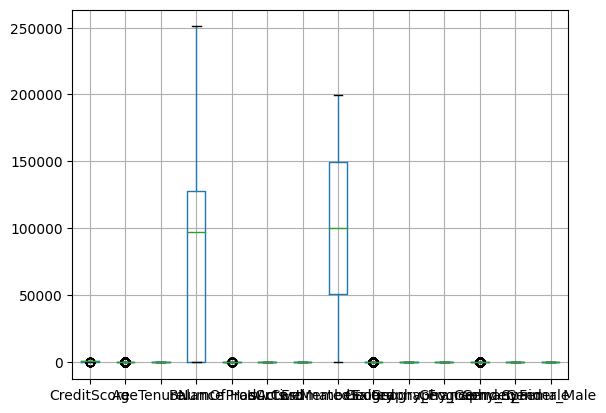

In [ ]:
df.boxplot()

<Axes: >

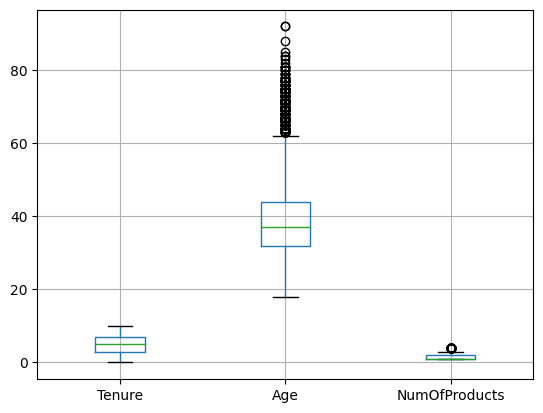

In [ ]:
df.boxplot(column=['Tenure','Age','NumOfProducts'])

**Univariate**

<Figure size 1600x800 with 0 Axes>

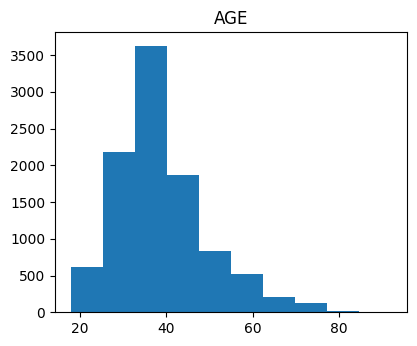

<Figure size 1600x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.hist(df.Age)
plt.title("AGE")
plt.figure(figsize=(16,8))

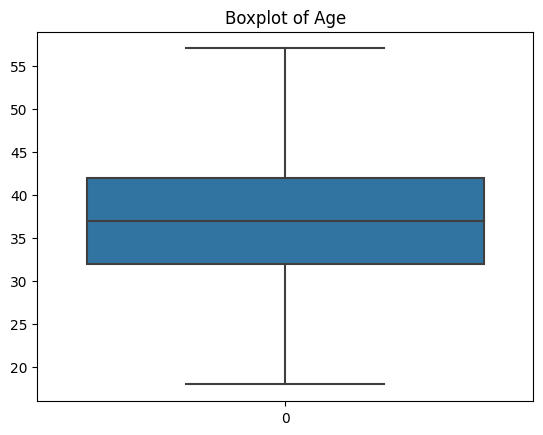

In [ ]:
for i in df['Age']:
    q1=df['Age'].quantile(0.25)
    q3=df['Age'].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if i>upper or i<lower:
      df['Age']= df['Age'].replace(i,np.median(df['Age']))
sns.boxplot(df['Age'])
plt.title("Boxplot of Age")
plt.show()

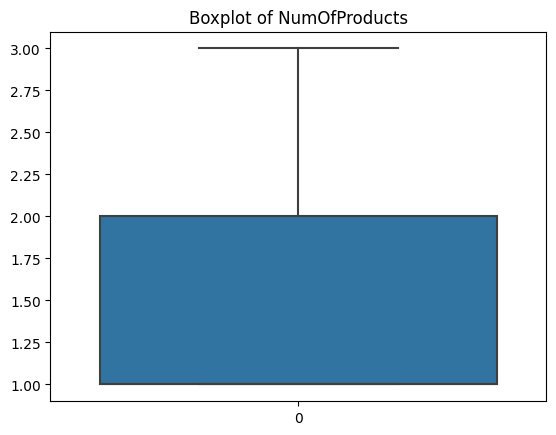

In [ ]:
for i in df['NumOfProducts']:
    q1=df['NumOfProducts'].quantile(0.25)
    q3=df['NumOfProducts'].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if i>upper or i<lower:
          df['NumOfProducts']=df['NumOfProducts'].replace(i,np.median(df['NumOfProducts']))
sns.boxplot(df['NumOfProducts'])
plt.title("Boxplot of NumOfProducts")
plt.show()

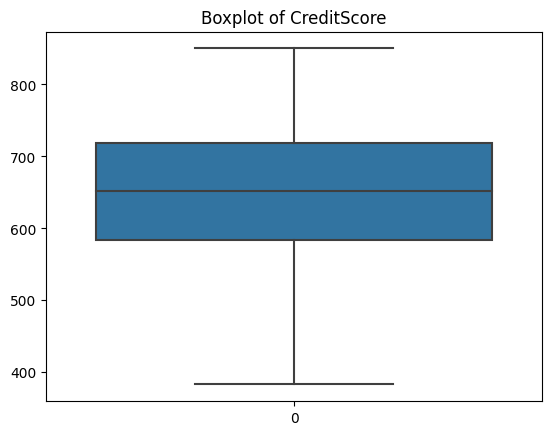

In [ ]:
for i in df['CreditScore']:
    q1=df['CreditScore'].quantile(0.25)
    q3=df['CreditScore'].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if i>upper or i<lower:
          df['CreditScore']=df['CreditScore'].replace(i,np.median(df['CreditScore']))
sns.boxplot(df['CreditScore'])
plt.title("Boxplot of CreditScore")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

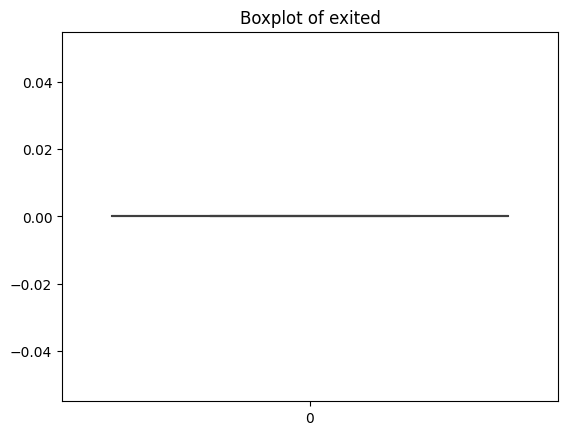

In [ ]:
for i in df['Exited']:
    q1=df['Exited'].quantile(0.25)
    q3=df['Exited'].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if i>upper or i<lower:
          df['Exited']=df['Exited'].replace(i,np.median(df['Exited']))
sns.boxplot(df['Exited'])
plt.title("Boxplot of exited")
plt.show

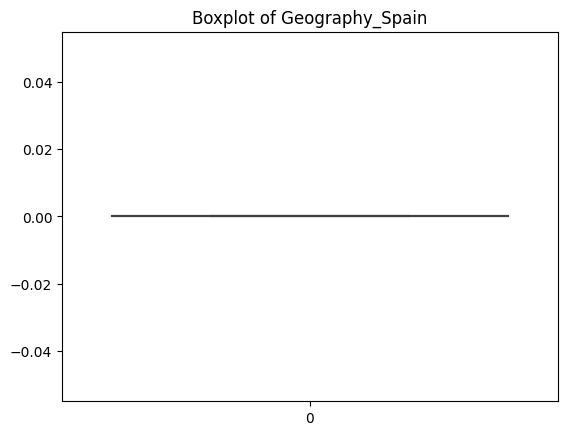

In [ ]:
for i in df['Geography_Spain']:
    q1=df['Geography_Spain'].quantile(0.25)
    q3=df['Geography_Spain'].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if i>upper or i<lower:
          df['Geography_Spain']=df['Geography_Spain'].replace(i,np.median(df['Geography_Spain']))
sns.boxplot(df['Geography_Spain'])
plt.title("Boxplot of Geography_Spain")
plt.show()

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, :-2].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 1/3, random_state= 0)

In [ ]:
X_train

array([[774.,  37.,   5., ...,   1.,   0.,   0.],
       [739.,  37.,   4., ...,   0.,   0.,   0.],
       [559.,  43.,   1., ...,   1.,   0.,   0.],
       ...,
       [738.,  35.,   5., ...,   1.,   0.,   0.],
       [590.,  38.,   9., ...,   0.,   0.,   0.],
       [623.,  48.,   1., ...,   0.,   1.,   0.]])

In [ ]:
y_train

array([1, 1, 0, ..., 1, 0, 0], dtype=uint8)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[-0.56230148, -0.26468064,  1.04218079, ..., -1.01328962,
         1.75415627,  0.        ],
       [-1.33036206,  0.38226903, -1.03418598, ...,  0.98688468,
        -0.57007464,  0.        ],
       [ 0.56903099,  0.6410489 ,  1.04218079, ..., -1.01328962,
        -0.57007464,  0.        ],
       ...,
       [-0.31320076,  1.28799858, -1.72630824, ...,  0.98688468,
        -0.57007464,  0.        ],
       [ 0.71433975, -1.81735986, -1.72630824, ..., -1.01328962,
         1.75415627,  0.        ],
       [-0.41699273,  0.38226903,  0.69611966, ..., -1.01328962,
         1.75415627,  0.        ]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state = 0).fit(X_train,y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_test)
print(cm)
accuracy_score(y_test, y_pred)

[[1476    0]
 [   0 1858]]


0.5572885422915417

<Axes: xlabel='Age', ylabel='NumOfProducts'>

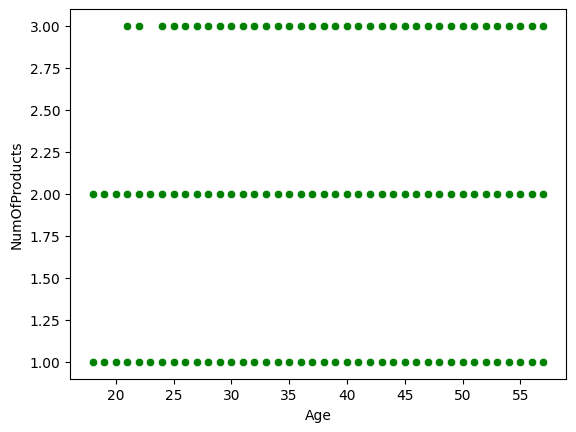

In [ ]:
sns.scatterplot(x=df.Age,y=df.NumOfProducts,color="green")